<a href="https://colab.research.google.com/github/KennethVA/KennethVA/blob/main/Copy_of_t04_random_walks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 4: Random Walks

© 2023 Griffin Chure & Manuel Razo-Mejia. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT)   

In [ ]:
# For scientific computing
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

---

In this tutorial, we will cover the basics of writing stochastic simulations and their application to biological phenomena ranging from the diffusion of molecules to genetic drift in populations.

## What is a stochastic simulation?

In science, we are often more interested in the distribution of a set of outcomes rather than a single event. This may be the probability distribution of a molecule diffusing a specific distance as a function of time, the distribution of mRNA molecules per cell produced from a constitutively expressing promoter, or the probability distribution of a model parameter given a collection of data. [Stochastic simulations](https://en.wikipedia.org/wiki/Stochastic_simulation) allow us to generate a series of simulations of a system in which one step (such as the direction a molecule will diffuse) is governed by random chance. These simulations often boil down to flipping a coin to dictate if said step will occur or not.

Of course, sitting in your office chair flipping a US quarter over and over again is not how one should do a simulation. To get a sense of the probability distribution of some outcome, we often have to simulate the process thousands of times. This means that we need to know how to make our computers do the heavy lifting.

It's often easy to forget just how powerful modern computers can be. What once required a serious computational cluster only twenty years ago can now be done on a 10 mm thick compartment made of rose-gold colored aluminium. In the following exercise, we will demonstate how you can learn about the behavior of biological systems from the comfort of your laptop in only half a screen of code.

## Example I: The Random Walk with single point source

Think of a molecule that moves either left or right with equal step probabilities at each subsequent time point. We can decide whether to walk left or right by flipping a coin and seeing if it comes up 'heads' or 'tails'.

In [ ]:
# Flip a coin three times.
flip_1 = np.random.rand()
flip_2 = np.random.rand()
flip_3 = np.random.rand()
print(flip_1, flip_2, flip_3)

0.9507098710927299 0.661357102001208 0.2461236747884461


Note that this will change every time that we run the code cell. How do we convert this to a 'heads' and 'tails' readout? We can assume that this is a totally fair coin. This means that the probability of getting "heads" to come up $P_H$ is the same as flipping a "tails" $P_T$ such that $P_H + P_T = 1$. This means that for a fair coin, $P_H = P_T = 0.5$. To convert our coin flips above, we simply have to test if the flip is above or below $0.5$. If it is below, we'll say that the coin was flipped "heads", otherwise, it is "tails".

In [ ]:
# Convert our coinflips to heads and tails.
flips = [flip_1, flip_2, flip_3]
for flip in flips:
    if flip < 0.5:
        print("Heads")
    else:
        print("Tails")

Tails
Tails
Heads


Now imagine that we wanted to flip the coin one thousand times. Obviously, we shouldn't write out a thousand variables and then loop through them. We could go through a loop for one thousand times and flip a coin at each step or flip one thousand coins at once and store them in an array. In the interest of simplicity, we'll go with option one. Let's flip a coin one thousand times and compute the probability of getting "heads".

In [ ]:
# Test that our coin flipping algorithm is fair.
n_flips = 1000  # That's a lot of flips!
p = 0.5  # Our anticipated probability of a heads.

# Flip the coin n_flips times.
flips = np.random.rand(n_flips)

# Compute the number of heads.
heads_or_tails = flips < p  # Will result in a True (1.0) if heads.
n_heads = np.sum(heads_or_tails)  # Gives the total number of heads.

# Compute the probability of a heads in our simulation.
p_sim = n_heads / n_flips
print('Predicted p = %s. Simulated p = %s.' %(p, p_sim))

Predicted p = 0.5. Simulated p = 0.496.


In the above code cell, we've also introduced a way to format strings using the `%s` formatter. We can specify that a value should inserted at that position (`%`) as a string (`s`) by providing a tuple of the values after the string in the order they should be inserted prefixed by a magic operator `%`. Note that these strings are inserted in the order in which they appear in the tuple.

We see that our simulated probability is very **close** to our imposed $P_H$, but not exactly. This is the nature of stochastic simulations. It's based on repeated random draws. If we were to continue to flip a coin more times, our simulated $P_H$ would get closer and closer to $0.5$. This is why doing many repetitions of stochastic simulations is necessary to generate reliable statistics.

So how do we relate this to diffusion? We'll start at position zero and flip a coin at each time step. If it is less than 0.5, we'll take a step left. Otherwise, we'll take a step to the right. At each time point, we'll keep track of our position and then plot our trajectory.

In [ ]:
# Define our step probability and number of steps.
step_prob = 0.5  # Can step left or right equally.
n_steps = 1000   # Essentially time.

# Set up a vector to store our positions.
position = np.zeros(n_steps)  # Full of zeros.

# Loop through each time step.
for i in range(1, n_steps):
    # Flip a coin.
    flip = np.random.rand()

    # Figure out which way we should step.
    if flip < step_prob:
        step = -1  # To the 'left'.
    else:
        step = 1  # to the 'right'.

    # Update our position based off of where we were in the last time point.
    position[i] = position[i-1] + step

Notice that at the beginning of our `for` loop, we specified our `range` to be from `1` to `n_steps`. This is because the first entry (index `0`) of our `position` vector is our starting position. Since we update our position at timepoint `i` based off of where we were at time step `i - 1`, we have to start at index `1`.

Now that we've taken the random walk, let's plot it. We'll take a look at where our molecule was at each time point.

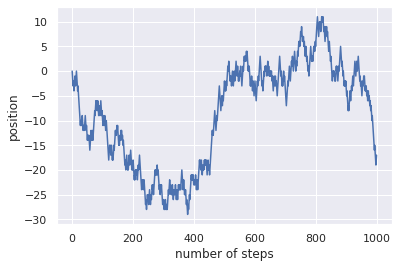

In [ ]:
# Make a vector of time points.
steps = np.arange(0, n_steps, 1)  # Arange from 0 to n_steps taking intervals of 1.

# Plot it!
plt.plot(steps, position)
plt.xlabel('number of steps')
plt.ylabel('position');

Again, since our steps are based on the generation of random numbers. This trajectory will change every time you run the code. As we discussed earlier, the power of stochastic simulation comes from doing them many times over. Let's write our random walk code again one thousand times and plot all of the traces.

In [ ]:
# Perform the random walk 1000 times.
n_simulations = 1000

# Make a new position vector. This will include all simulations.
position = np.zeros((n_simulations, n_steps))

# Redefine our step probability just to be clear.
step_prob = 0.5

# Loop through each simulation.
for i in range(n_simulations):
    # Loop through each step.
    for j in range(1, n_steps):
        # Flip a coin.
        flip = np.random.rand()

        # Figure out how to step.
        if flip < step_prob:
            step = -1
        else:
            step = 1

        # Update our position.
        position[i, j] = position[i, j-1] + step

You'll notice that this cell took a little bit longer to run than the previous one. This is because we are doing the simulation a thousand times over! To show the random walks, we'll plot all of the trajectories over each other as thin lines.  

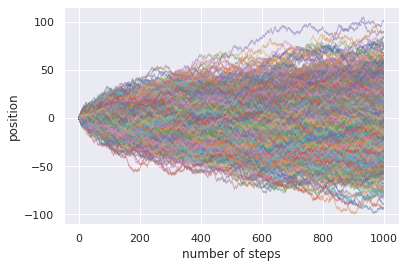

In [ ]:
# Plot all of the trajectories together.
for i in range(n_simulations):
    # Remembering that `position` is just a two-dimensional matrix that is
    # n_simulations by n_steps, we can get each step for a given simulation
    # by indexing as position[i, :].
    plt.plot(steps, position[i, :], linewidth=1, alpha=0.5)

# Add axis labels.
plt.xlabel('number of steps')
plt.ylabel('position');

Pretty cool!  We can look at the distribution of positions at various steps in time by making histograms of the positions of each simulation. Let's take a look at the distribution of positions at $t = 200$ steps.

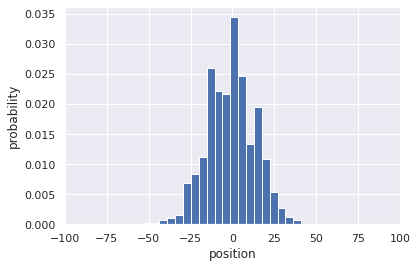

In [ ]:
# Make a histogram of the positions. To look at t=200, we have to index at
# 199 because indexing starts at 0  in Python. We'll also normalize the
# histogram (normed=True) so we can get a measure of probability.
plt.hist(position[:, 199], bins=20, density=True)
plt.xlabel('position')
plt.ylabel('probability')

# Set the xlimits to cover the entire range.
plt.xlim([-100, 100]);

We see that this qualitatively appears to be Gaussian. If we had to guess, we could say that the mean looks like it is right at about zero. Let's take a look at the distribution of positions at the last time point as well.

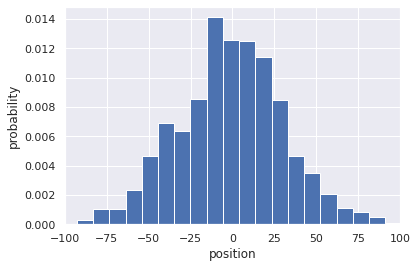

In [ ]:
# Make a histogram of the position distribution at the last time step. We could
# just index at 999, but indexing at -1 will always return the distribution at
# the last time step, whatever that may be.
plt.hist(position[:, -1], bins=20, density=True)
plt.xlabel('position')
plt.ylabel('probability')
plt.xlim([-100, 100]);

Again, this distribution looks somewhat Gaussian with a mean of approximately zero. We can actually compute the mean position from our simulation by iterating through each time step and simply computing the mean. Let's plot the mean at each time point as a red line.

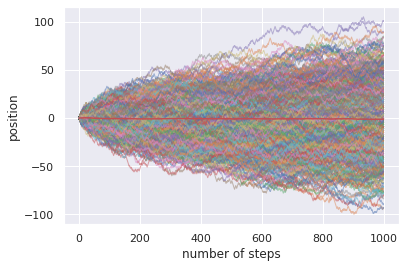

In [ ]:
# Compute the mean position at each step and plot it.
mean_position = np.zeros(n_steps)
for i in range(n_steps):
    mean_position[i] = np.mean(position[:, i])

# Plot all of the simulations.
for i in range(n_simulations):
    plt.plot(steps, position[i, :], linewidth=1, alpha=0.5)

# Plot the mean as a thick red line.
plt.plot(steps, mean_position, 'r-')

# Add the labels.
plt.xlabel('number of steps')
plt.ylabel('position');

As we will learn in a few weeks, this is exactly what we would expect. While the mean position is zero, the mean squared displacement is not quite so trivial. Let's compute this value and plot it as a function of the number of steps.

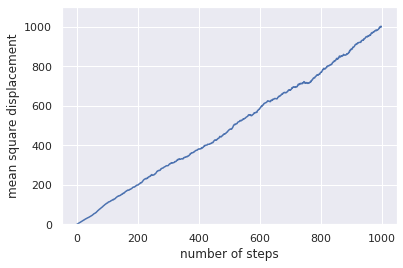

In [ ]:
# Compute the mean squared displacement.
msd = np.zeros(n_steps)
for i in range(n_steps):
    msd[i] = np.mean(position[:, i]**2)

# Plot the mean squared as a function of the number of steps.
plt.plot(steps, msd)
plt.xlabel('number of steps')
plt.ylabel('mean square displacement')
plt.ylim([0, 1100]);

That certainly looks like it scales linearly with the number of steps, just as we predicted.

## Example II: The Random Walk with reflective boundaries

In the first example we look at a series of unbounded random walkers. We even showed that the mean square displacement of the walkers grows linearly as time progresses. If we were to let the simulation run for much longer times, this trend would continue indefinitely. But we know that the world is finite. Furthermore, for cells that range between 1 µm for a bacteria to 1 mm for a *Xenopus* frog egg to ≈ 1 m for a long neuron axon, there is a limit of how far molecules can diffuse before running into a boundary.

Our simulations can include such boundaries. For our particular purpose we will consider reflective boundaries--as opposed to absorbing boundaries--such that when a molecule hits the wall, it is simply reflected back to continue its random walk within this bounded region. The trick lies in keeping track of the position of the particle with respect to the boundary, and whenever the trajectory exceeds the boundary, for the specific step in which this happens, we simply multiply the displacement by -1, implementing in this way the reflective nature of the boundary.

Let's work through an example. First we will define the size of the boundary (which we will consider to be $\pm$ the defined size.

In [ ]:
# Define size of bounding box
box = 20

Now we can use the exact same code as before for the single walker. The difference being that at each step we will check whether or not the particle went pass the boundary, and if so, we will reflect the trajectory.

In [ ]:
# Define our step probability and number of steps.
step_prob = 0.5  # Can step left or right equally.
n_steps = 5000   # Essentially time.

# Set up a vector to store our positions.
position = np.zeros(n_steps)  # Full of zeros.

# Loop through each time step.
for i in range(1, n_steps):
    # Flip a coin.
    flip = np.random.rand()

    # Figure out which way we should step.
    if flip < step_prob:
        step = -1  # To the 'left'.
    else:
        step = 1  # to the 'right'.

    # Check if the position is pass the boundary
    if (position[i-1] + step > box) or (position[i-1] + step < -box):
        # If it is pass the boundary, reflect the trajectory
        position[i] = position[i-1] - step
    # Otherwise add the regular step
    else:
        # Update our position based off of where we were in the last time point.
        position[i] = position[i-1] + step

And with this simple extra `if` statement we have implemented our reflective boundary! Let's take a look at the trajectory

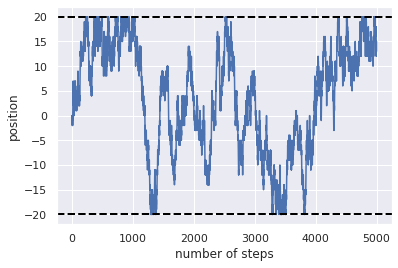

In [ ]:
# Make a vector of time points.
steps = np.arange(0, n_steps, 1)  # Arange from 0 to n_steps taking intervals of 1.

# Plot it!
plt.plot(steps, position)

# Add lines defining boundary
plt.axhline(box, lw=2, linestyle="--", color="black")
plt.axhline(-box, lw=2, linestyle="--", color="black")

plt.xlabel('number of steps')
plt.ylabel('position');

We can see that indeed the walker is bounded by the limits that we set. Just for fun let's run multiple trajectories.

In [ ]:
# Redefine box size
box = 20

# Define number of simulations
n_simulations = 10

# Define number of steps
n_steps = 1000

# Make a new position vector. This will include all simulations.
position = np.zeros((n_simulations, n_steps))

# Redefine our step probability just to be clear.
step_prob = 0.5

# Loop through each simulation.
for i in range(n_simulations):
    # Loop through each step.
    for j in range(1, n_steps):
        # Flip a coin.
        flip = np.random.rand()

        # Figure out how to step.
        if flip < step_prob:
            step = -1
        else:
            step = 1
        # Check if the position is pass the boundary
        if (position[i, j-1] + step > box) or (position[i, j-1] + step < -box):
            # If it is pass the boundary, reflect the trajectory
            position[i, j] = position[i, j-1] - step
        # Otherwise add the regular step
        else:
            # Update our position based off of where we were in the last time point.
            position[i, j] = position[i, j-1] + step

and now we are ready to look at the multiple trajectories

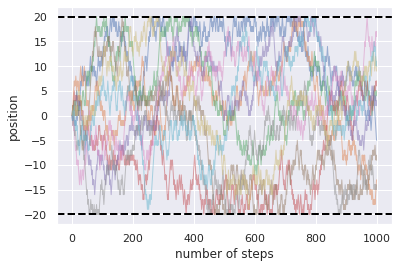

In [ ]:
# Make a vector of time points.
steps = np.arange(0, n_steps, 1)  # Arange from 0 to n_steps taking intervals of 1.

# Plot all of the simulations.
for i in range(n_simulations):
    plt.plot(steps, position[i, :], linewidth=1, alpha=0.5)

# Add lines defining boundary
plt.axhline(box, lw=2, linestyle="--", color="black")
plt.axhline(-box, lw=2, linestyle="--", color="black")

# Add the labels.
plt.xlabel('number of steps')
plt.ylabel('position');

## Example III: The Random Walk with varying initial conditions

In the previous examples all of our trajectories had the exact same origin--which we defined to be position zero--which corresponds to a single point-source from which all molecules start diffusing away. Although fun and simple, this is a highly idealized initial condition for our walkers. In this example we will relax this assumption a little bit by allowing our walkers to start at different points. Let's allow the initial condition of the walkers to be uniformly distributed between two points. All we have to do is generate random integers between these two points, and set them as the initial condition of the walkers. For this we will use `numpy`'s `randint` function.

In [ ]:
# Define box size
box = 20

# Define bounds for inital conditions
bounds = [4, 12]

# Define number of simulations
n_simulations = 10

# Define number of steps
n_steps = 400

# Make a new position vector. This will include all simulations.
position = np.zeros((n_simulations, n_steps))

# Set initial conditions by generating random numbers between the bounds
position[:, 0] = np.random.randint(bounds[0], bounds[1], size=n_simulations)

That's it! All we have to do now is generate the random trajectories as before.

In [ ]:
# Redefine our step probability just to be clear.
step_prob = 0.5

# Loop through each simulation.
for i in range(n_simulations):
    # Loop through each step.
    for j in range(1, n_steps):
        # Flip a coin.
        flip = np.random.rand()

        # Figure out how to step.
        if flip < step_prob:
            step = -1
        else:
            step = 1
        # Check if the position is pass the boundary
        if (position[i, j-1] + step > box) or (position[i, j-1] + step < -box):
            # If it is pass the boundary, reflect the trajectory
            position[i, j] = position[i, j-1] - step
        # Otherwise add the regular step
        else:
            # Update our position based off of where we were in the last time point.
            position[i, j] = position[i, j-1] + step

And now we are ready to plot it.

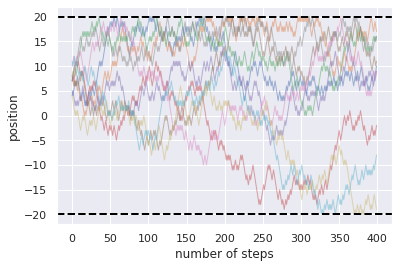

In [ ]:
# Make a vector of time points.
steps = np.arange(0, n_steps, 1)  # Arange from 0 to n_steps taking intervals of 1.

# Plot all of the simulations.
for i in range(n_simulations):
    plt.plot(steps, position[i, :], linewidth=1, alpha=0.5)

# Add lines defining boundary
plt.axhline(box, lw=2, linestyle="--", color="black")
plt.axhline(-box, lw=2, linestyle="--", color="black")

# Add the labels.
plt.xlabel('number of steps')
plt.ylabel('position');

##  In conclusion...

In this tutorial, we've introduced a set of skills that will be useful in whatever field of science you choose to pursue. The ability of writing simulations allows you to get a feeling for the behavior of a physical system without necessarily having to grind through an analytical solution. While we covered only two examples of one-dimensional stochastic simulations, these same principles can be applied to many other types questions.